In [8]:
import pandas as pd 
import json
from pandas.io.json import json_normalize


In [9]:
# 1) Find the 10 countries with most projects

df=pd.read_json('world_bank_projects.json')
count_country=df[['countrycode', 'countryname', 'countryshortname']].groupby(['countrycode', 'countryname', 'countryshortname']).size().reset_index(name="count").sort_values("count", ascending=False)
count_country.head(10)
count_country=count_country[count_country.countrycode !='3A']
count_country.head(10)


,countrycode,countryname,countryshortname,count
45,ID,Republic of Indonesia,Indonesia,19
28,CN,People's Republic of China,China,19
110,VN,Socialist Republic of Vietnam,Vietnam,17
46,IN,Republic of India,India,16
88,RY,Republic of Yemen,"Yemen, Republic of",13
60,MA,Kingdom of Morocco,Morocco,12
15,BD,People's Republic of Bangladesh,Bangladesh,12
78,NP,Nepal,Nepal,12
73,MZ,Republic of Mozambique,Mozambique,11
83,PK,Islamic Republic of Pakistan,Pakistan,9


In [10]:
# 2) Find the top 10 major project themes (using column 'mjtheme_namecode')

with open('world_bank_projects.json') as data_file:    
    json_data = json.load(data_file)
    
df_mjthemes= json_normalize(json_data, 'mjtheme_namecode')

In [13]:
by_count_theme = df_mjthemes.groupby(['code', 'name']).size().reset_index(name="count").sort_values('count', ascending=False)
by_count_theme.head(10)

,code,name,count
5,11,Environment and natural resources management,223
3,10,Rural development,202
19,8,Human development,197
7,2,Public sector governance,184
15,6,Social protection and risk management,158
11,4,Financial and private sector development,130
17,7,Social dev/gender/inclusion,119
13,5,Trade and integration,72
21,9,Urban development,47
1,1,Economic management,33


In [15]:
# 3) Create a dataframe with the missing names filled in
df_mjthemes_map=df_mjthemes.groupby("code")["name"].describe().reset_index()
df_mjthemes_map=df_mjthemes_map[['code', 'top']].rename(columns={"top":"name"})
df_mjthemes_fill = df_mjthemes[['code']].merge(df_mjthemes_map, how="left", on="code")

In [17]:
by_count_by_theme_filled = df_mjthemes_fill.groupby(['code', 'name']).size().reset_index(name='count').sort_values('count', ascending=False)
by_count_by_theme_filled.head(10)

,code,name,count
2,11,Environment and natural resources management,250
1,10,Rural development,216
9,8,Human development,210
3,2,Public sector governance,199
7,6,Social protection and risk management,168
5,4,Financial and private sector development,146
8,7,Social dev/gender/inclusion,130
6,5,Trade and integration,77
10,9,Urban development,50
0,1,Economic management,38


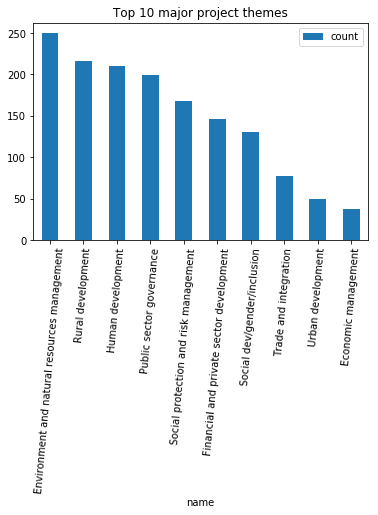

In [18]:
%matplotlib inline
by_count_by_theme_filled.head(10).plot(kind='bar', x='name', title="Top 10 major project themes", rot=85)